In [1]:
import h5py
import numpy as np
import os,random
from tensorflow.keras.layers import Input,Reshape,ZeroPadding2D,Conv2D,Dropout,Flatten,Dense,Activation,MaxPooling2D,AlphaDropout
from tensorflow.keras import layers
import tensorflow.keras.models as Model
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

In [2]:
f = h5py.File(r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part0.h5')
sample_num = f['X'].shape[0]
# idx = np.random.choice(range(0,sample_num),size=3375)
idx = np.random.choice(range(0,sample_num),size=60000)
X = f['X'][:][idx]
Y = f['Y'][:][idx]
Z = f['Z'][:][idx]
f.close()

for i in range(1,24):
    if i%1 == 0:
        !free -m
    '''if i == 10:
        continue'''
    filename = r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part'+str(i) + '.h5'
    print(filename)
    f = h5py.File(filename,'r')
    X = np.vstack((X,f['X'][:][idx]))
    Y = np.vstack((Y,f['Y'][:][idx]))
    Z = np.vstack((Z,f['Z'][:][idx]))
    f.close()


print('X-size：',X.shape)
print('Y-size：',Y.shape)
print('Z-size：',Z.shape)

C:\Users\hutom\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part1.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part2.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part3.h5
C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part4.h5


'free' is not recognized as an internal or external command,
operable program or batch file.
'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part5.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part6.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part7.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part8.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part9.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part10.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part11.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part12.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part13.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part14.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part15.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part16.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part17.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part18.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part19.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part20.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part21.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part22.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part23.h5
X-size： (1440000, 1024, 2)
Y-size： (1440000, 24)
Z-size： (1440000, 1)


## Data preprocessing, and obtain training set and test set

In [3]:
n_examples = X.shape[0]
# n_train = int(n_examples * 0.9877) 
n_train = int(n_examples * 0.8)  
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)  #Randomly select training sample subscript
test_idx = list(set(range(0,n_examples))-set(train_idx)) #Test sample index
X_train = X[train_idx]  #training samples
X_test =  X[test_idx]  #testing samples
Y_train = Y[train_idx]
Y_test = Y[test_idx]
print("X_train:",X_train.shape)
print("Y_train:",Y_train.shape)
print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)

X_train: (1152000, 1024, 2)
Y_train: (1152000, 24)
X_test: (288000, 1024, 2)
Y_test: (288000, 24)


In [4]:
X_train[0]

array([[ 0.15971623, -0.5294041 ],
       [ 0.2877699 , -0.07897466],
       [-0.16733627, -0.9590795 ],
       ...,
       [ 1.620727  , -0.4518532 ],
       [ 0.88373125,  0.11174811],
       [ 0.3728754 ,  1.6412148 ]], dtype=float32)

In [5]:
X_train.shape[1:] 
# Input(in_shp)

(1024, 2)

In [6]:
classes = ['32PSK',
 '16APSK',
 '32QAM',
 'FM',
 'GMSK',
 '32APSK',
 'OQPSK',
 '8ASK',
 'BPSK',
 '8PSK',
 'AM-SSB-SC',
 '4ASK',
 '16PSK',
 '64APSK',
 '128QAM',
 '128APSK',
 'AM-DSB-SC',
 'AM-SSB-WC',
 '64QAM',
 'QPSK',
 '256QAM',
 'AM-DSB-WC',
 'OOK',
 '16QAM']

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)
    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights 
    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output
    
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
    def get_config(self):
        cfg = super().get_config()
#         cfg.update({
#             'att': self.MultiHeadSelfAttention(1024, 128),
#             'ffn': self.tf.keras.Sequential(
#             [layers.Dense(256, activation="relu"), layers.Dense(1024),]
#         ),
#             'layernorm1': self.layers.LayerNormalization(epsilon=1e-6),
#             'layernorm2': self.layers.LayerNormalization(epsilon=1e-6),
#             'dropout1': self.Dropout(0.2),
#             'dropout2': self.Dropout(0.2),
#         })
        return cfg    
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
def proposed_model(X_train,classes):

    embed_dim = 1024  # Embedding size for each token
    num_heads = 128  # Number of attention heads
    ff_dim = 256  # Hidden layer size in feed forward network inside transformer

#     inputs = layers.Input(shape=(maxlen,))
#     embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
#     x = embedding_layer(inputs)
#     mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0","/gpu:1","/gpu:2"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
#     with mirrored_strategy.scope():
    in_shp = X_train.shape[1:]   #Dimensions of each sample

    #input layer
    X_input = Input(in_shp)
    X = Reshape([2,1024], input_shape=in_shp)(X_input)

    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(X)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.AlphaDropout(0.3)(x)
    x = layers.Dense(128, activation="selu")(x)
    x = layers.AlphaDropout(0.2)(x)
    x = layers.Dense(128, activation="selu")(x)
    x = layers.AlphaDropout(0.2)(x)
    x = layers.Dense(24, activation="softmax")(x)

#         X = Dense(len(classes))(x)
#         #SoftMax
#         X = Activation('softmax')(x)
    return tf.keras.models.Model(inputs=X_input, outputs=x)     
    
model = proposed_model(X_train,classes)    
# from focal_loss import BinaryFocalLoss
# model.compile(loss=tfa.losses.triplet_hard_loss, optimizer=tfa.optimizers.LazyAdam(),metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=tfa.optimizers.LazyAdam(),metrics=['accuracy'])
model.load_weights('trafo_model')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 2)]         0         
_________________________________________________________________
reshape (Reshape)            (None, 2, 1024)           0         
_________________________________________________________________
transformer_block (Transform (None, 2, 1024)           4728064   
_________________________________________________________________
global_average_pooling1d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
%%time
filepath = 'transformer_model.h5'
history = model.fit(X_train,
    Y_train,
    batch_size=1024,
    epochs=1000,
    verbose=1,
    shuffle=True,
#     validation_data=(X_test, Y_test),
    validation_split = 0.1,
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
    ])

Epoch 1/1000
1013/1013 [==============================] - ETA: 0s - loss: 1.4423 - accuracy: 0.5515
Epoch 00001: val_loss improved from inf to 2.08248, saving model to transformer_model.h5
1013/1013 [==============================] - 28s 28ms/step - loss: 1.4423 - accuracy: 0.5515 - val_loss: 2.0825 - val_accuracy: 0.5412
Epoch 2/1000
1011/1013 [============================>.] - ETA: 0s - loss: 1.3792 - accuracy: 0.5637
Epoch 00002: val_loss did not improve from 2.08248
1013/1013 [==============================] - 26s 26ms/step - loss: 1.3793 - accuracy: 0.5637 - val_loss: 2.0956 - val_accuracy: 0.5415
Epoch 3/1000
1013/1013 [==============================] - ETA: 0s - loss: 1.3391 - accuracy: 0.5709
Epoch 00003: val_loss did not improve from 2.08248
1013/1013 [==============================] - 26s 26ms/step - loss: 1.3391 - accuracy: 0.5709 - val_loss: 2.1080 - val_accuracy: 0.5420
Epoch 4/1000
1011/1013 [============================>.] - ETA: 0s - loss: 1.3058 - accuracy: 0.5778
Epoc

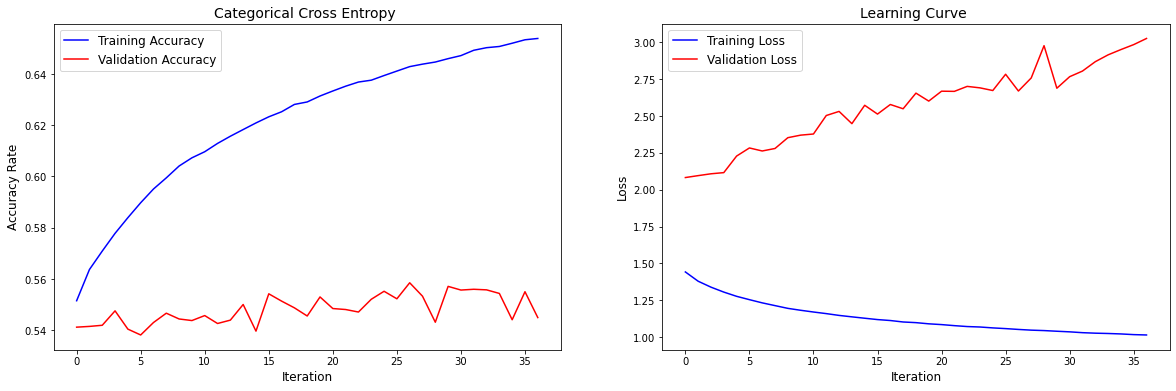

In [15]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title('Categorical Cross Entropy ',fontsize=14)
ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve ',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

In [ ]:
# model = load_model('trafo_model.hdf5',compile = False)

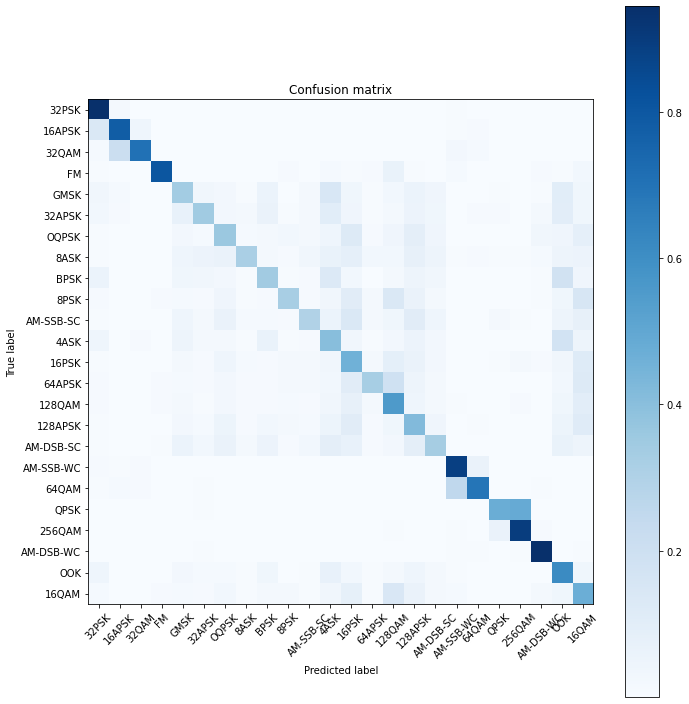

In [7]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot confusion matrix
batch_size = 1024
test_Y_hat = model.predict(X_test, batch_size=3000)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [8]:
for i in range(len(confnorm)):
    print(classes[i],confnorm[i,i])

32PSK 0.9440518746362956
16APSK 0.7811952988247062
32QAM 0.7071216126900198
FM 0.8075898801597869
GMSK 0.3379831932773109
32APSK 0.3442143930539322
OQPSK 0.35799284347174837
8ASK 0.3182156133828996
BPSK 0.342938277791698
8PSK 0.32286621012193084
AM-SSB-SC 0.29740401579433756
4ASK 0.40519698239731766
16PSK 0.4610169491525424
64APSK 0.32645075347598035
128QAM 0.5545552159907492
128APSK 0.41883881445391796
AM-DSB-SC 0.3319163124114362
AM-SSB-WC 0.8874155616712535
64QAM 0.6904246461282265
QPSK 0.4740654400133211
256QAM 0.8954598760261351
AM-DSB-WC 0.9433805162364696
OOK 0.6153781583144464
16QAM 0.47163979617408736


Overall Accuracy -20:  0.6982902235861465
Overall Accuracy -18:  0.6911421911421911
Overall Accuracy -16:  0.6949346561098922
Overall Accuracy -14:  0.7002109898174479
Overall Accuracy -12:  0.708933982187127
Overall Accuracy -10:  0.7052417866371354
Overall Accuracy -8:  0.7226126885952582
Overall Accuracy -6:  0.726027397260274
Overall Accuracy -4:  0.7173520923520924
Overall Accuracy -2:  0.6917192920039136


C:\Users\hutom\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Overall Accuracy 0:  0.6120804180320609
Overall Accuracy 2:  0.5221254987305042
Overall Accuracy 4:  0.45270022042615726
Overall Accuracy 6:  0.4405187835420394
Overall Accuracy 8:  0.42406798245614036
Overall Accuracy 10:  0.41975195222783646
Overall Accuracy 12:  0.4227296866702071
Overall Accuracy 14:  0.4125624553890079
Overall Accuracy 16:  0.42485574789169994
Overall Accuracy 18:  0.41695212999560827
Overall Accuracy 20:  0.4248495270851247
Overall Accuracy 22:  0.422582646459275
Overall Accuracy 24:  0.4292117057737938
Overall Accuracy 26:  0.4257234726688103
Overall Accuracy 28:  0.4245810055865922
Overall Accuracy 30:  0.4215823315627621


<Figure size 432x288 with 0 Axes>

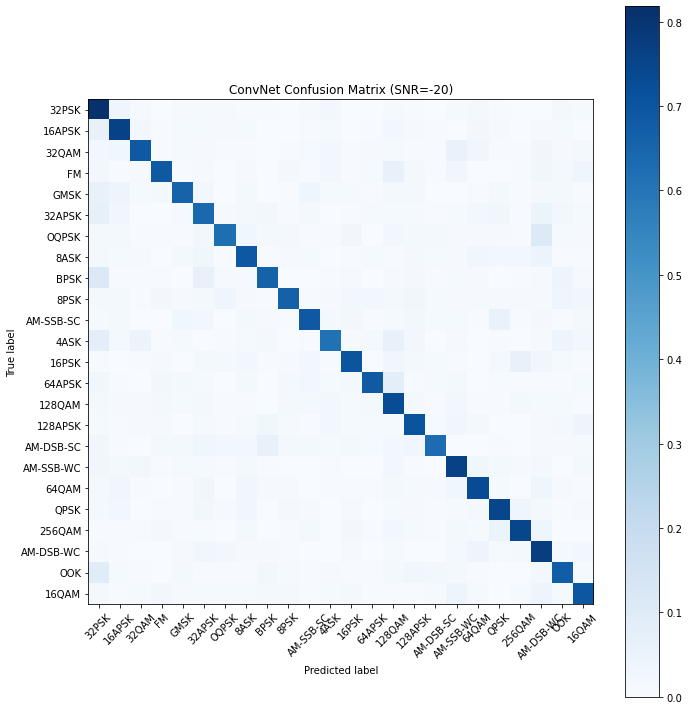

<Figure size 432x288 with 0 Axes>

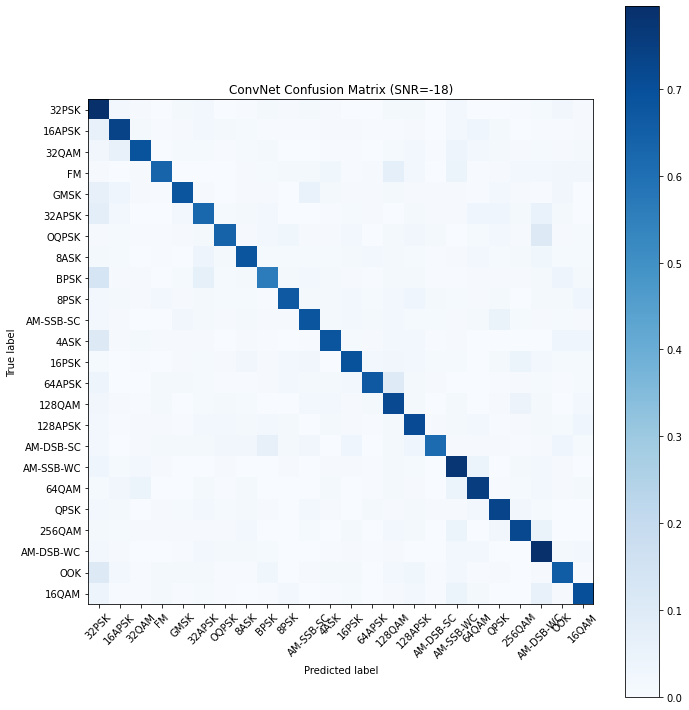

<Figure size 432x288 with 0 Axes>

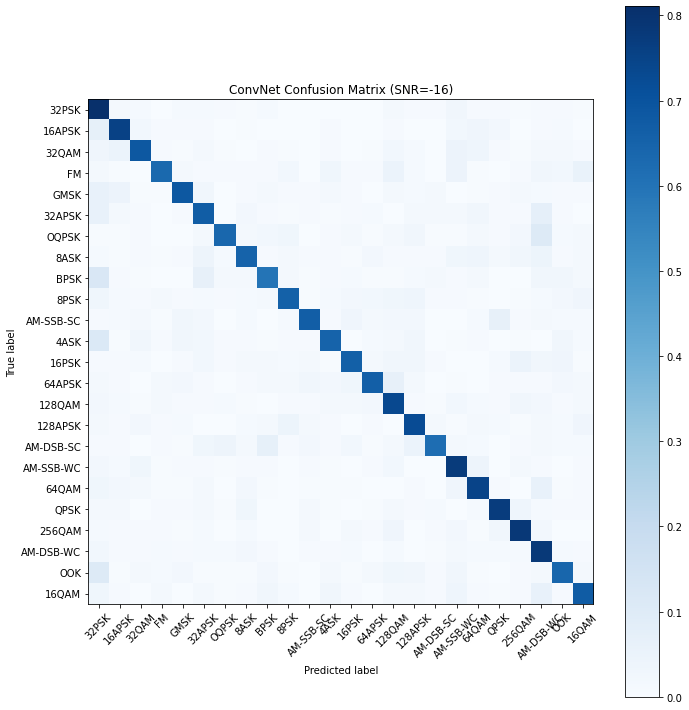

<Figure size 432x288 with 0 Axes>

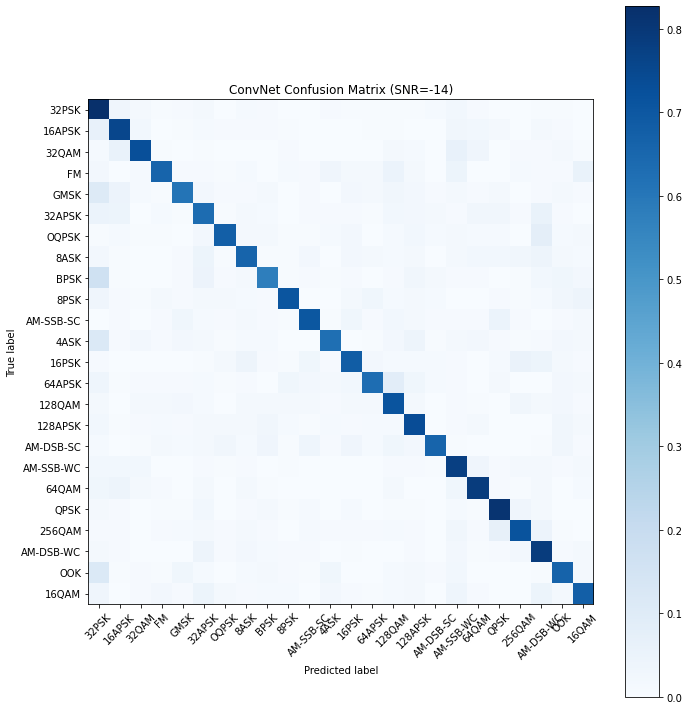

<Figure size 432x288 with 0 Axes>

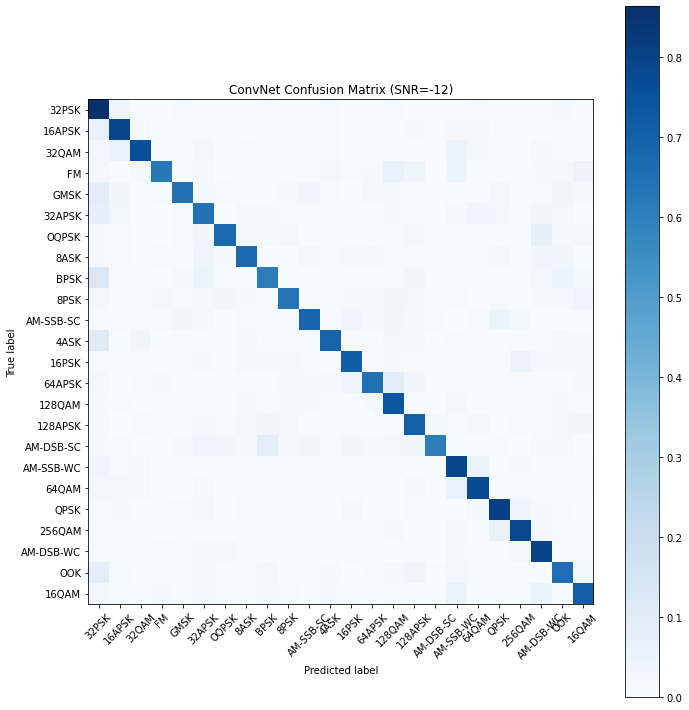

<Figure size 432x288 with 0 Axes>

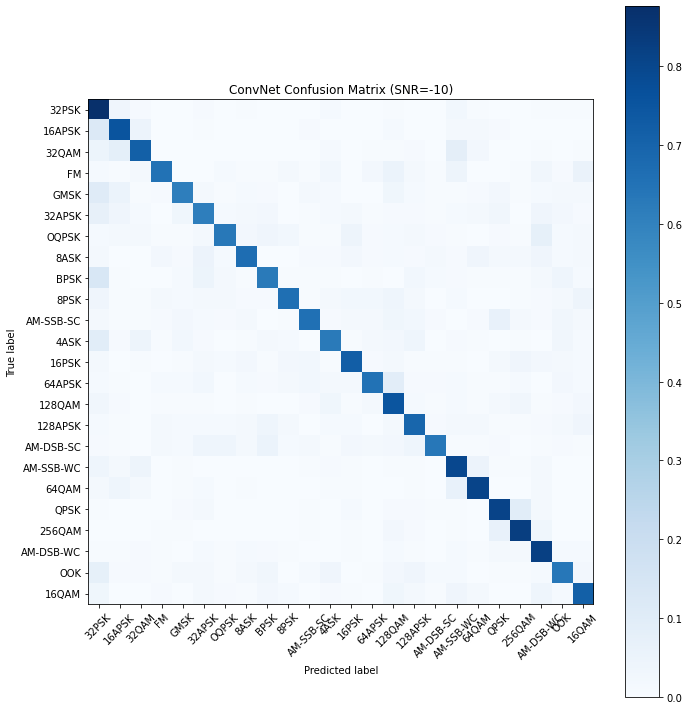

<Figure size 432x288 with 0 Axes>

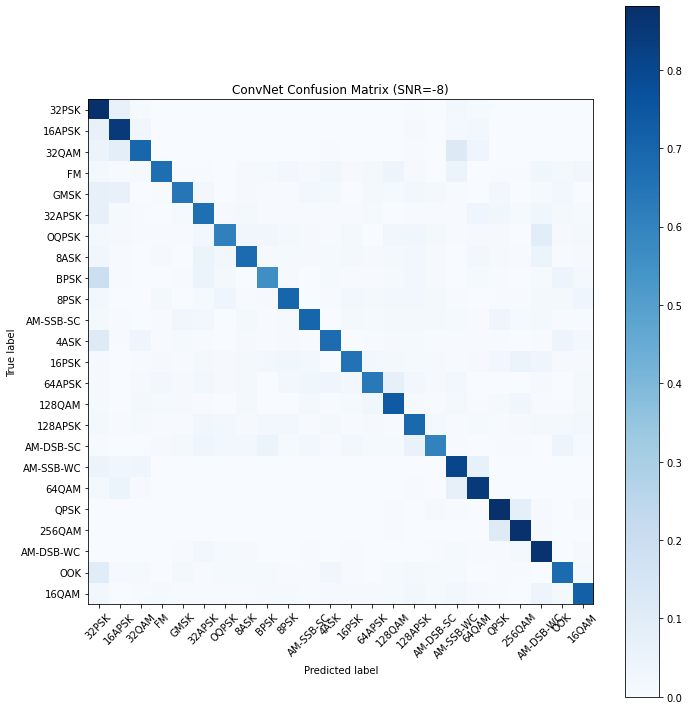

<Figure size 432x288 with 0 Axes>

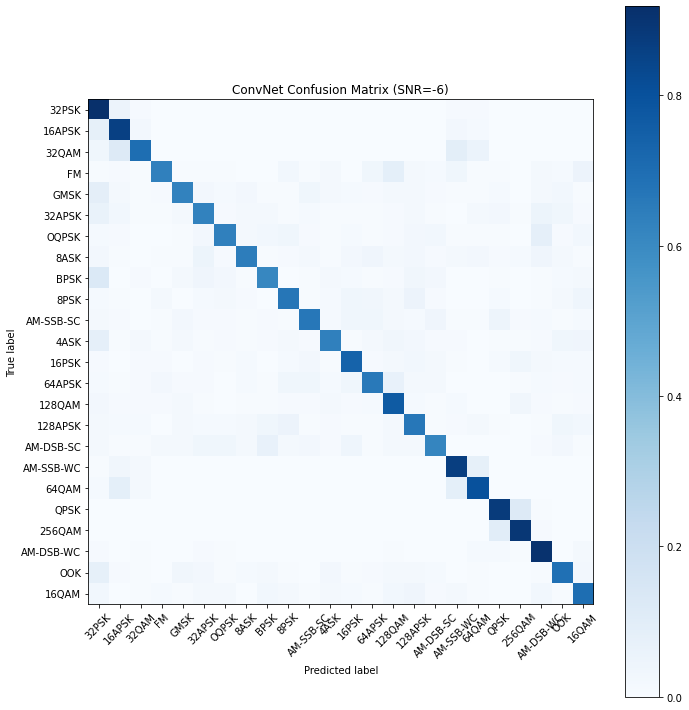

<Figure size 432x288 with 0 Axes>

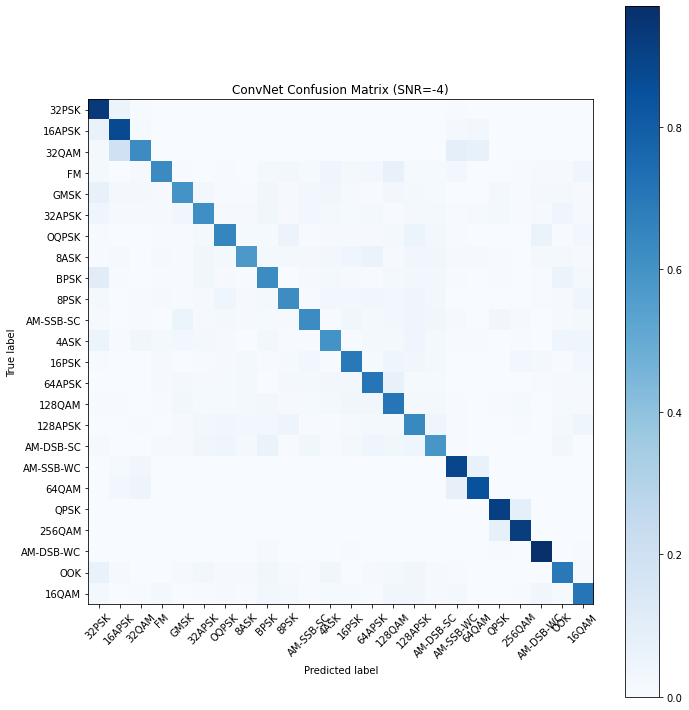

<Figure size 432x288 with 0 Axes>

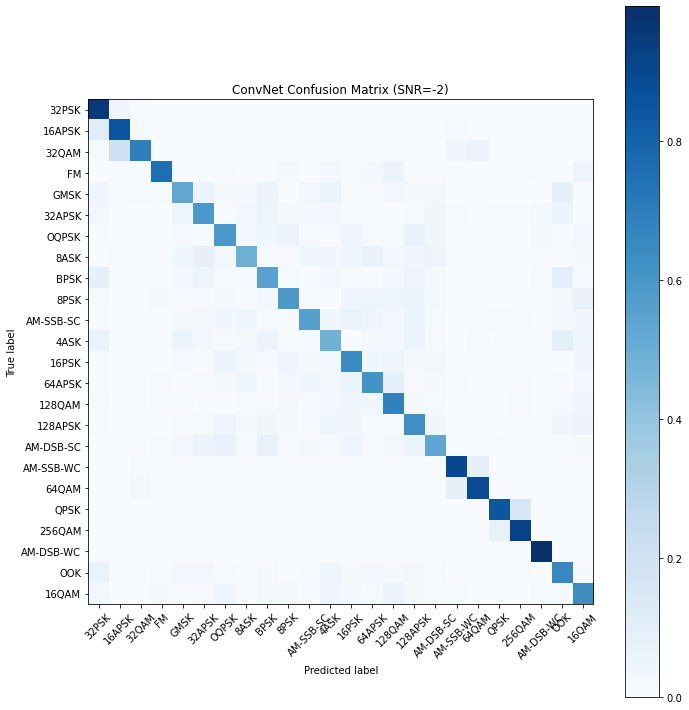

<Figure size 432x288 with 0 Axes>

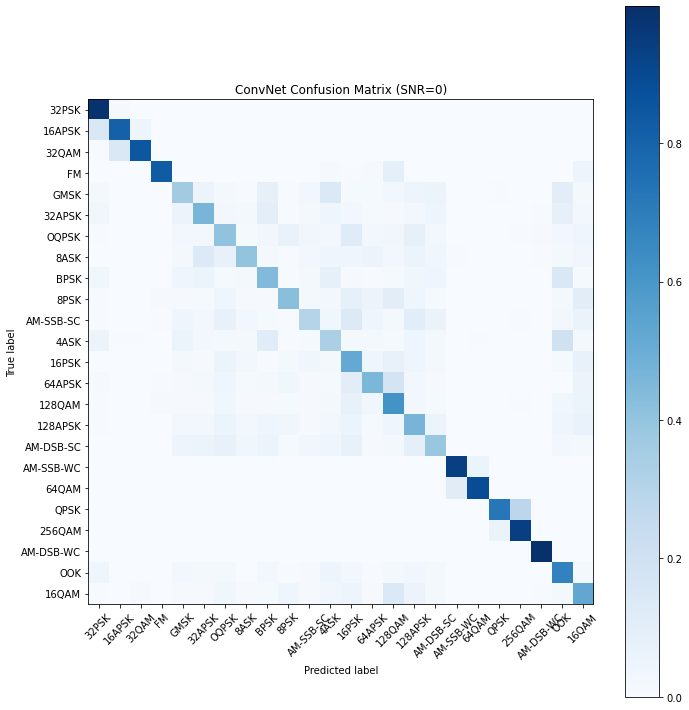

<Figure size 432x288 with 0 Axes>

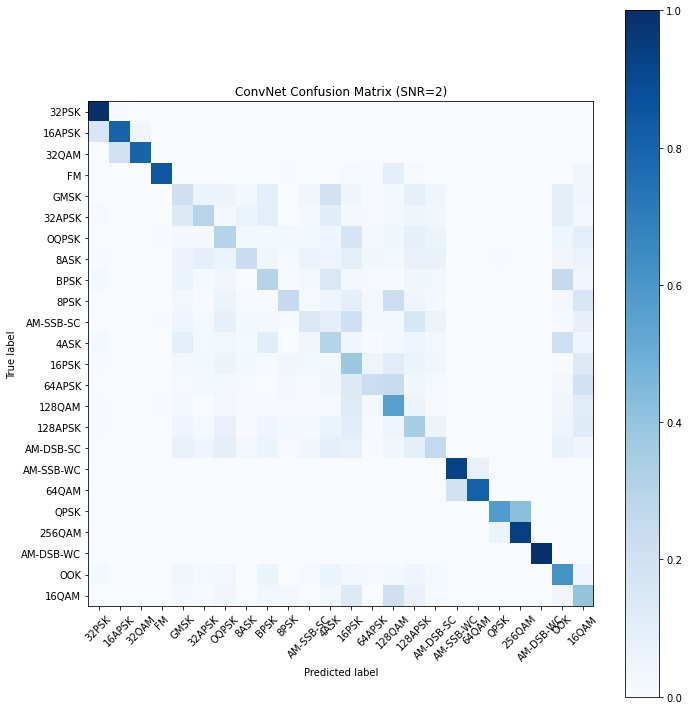

<Figure size 432x288 with 0 Axes>

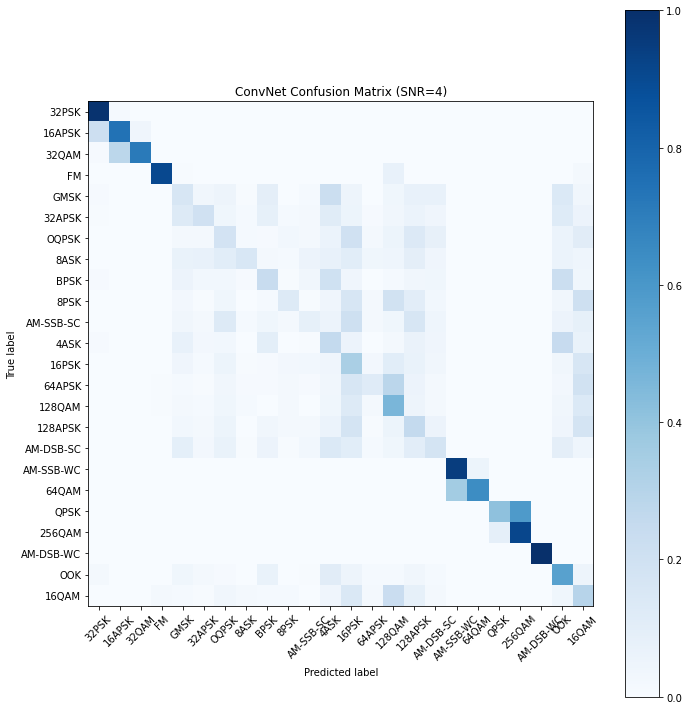

<Figure size 432x288 with 0 Axes>

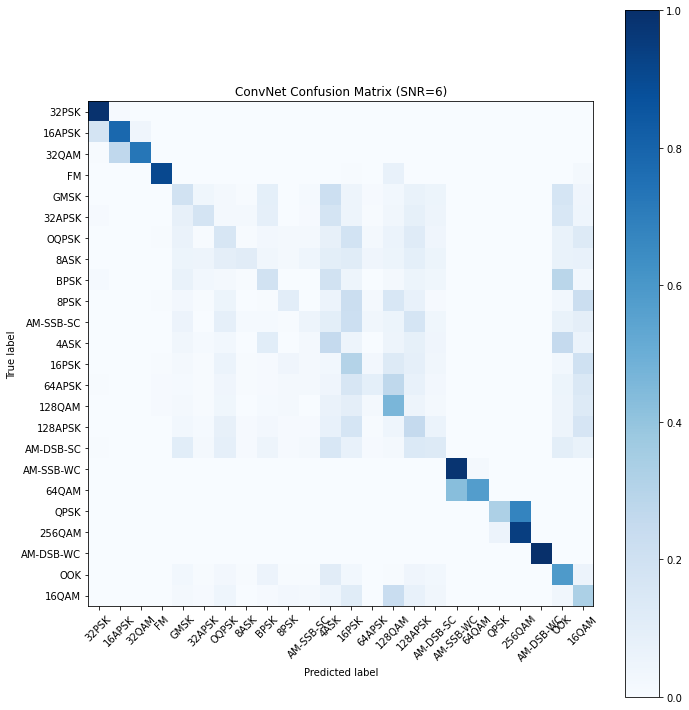

<Figure size 432x288 with 0 Axes>

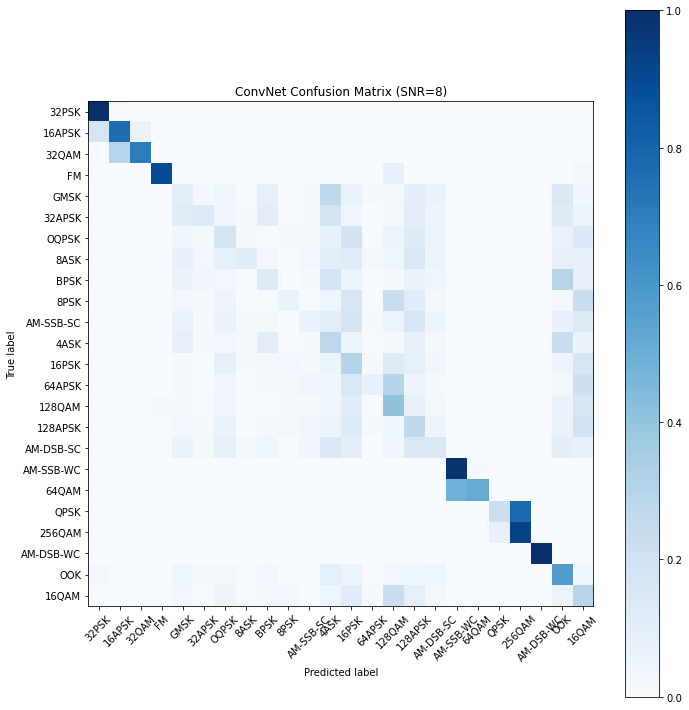

<Figure size 432x288 with 0 Axes>

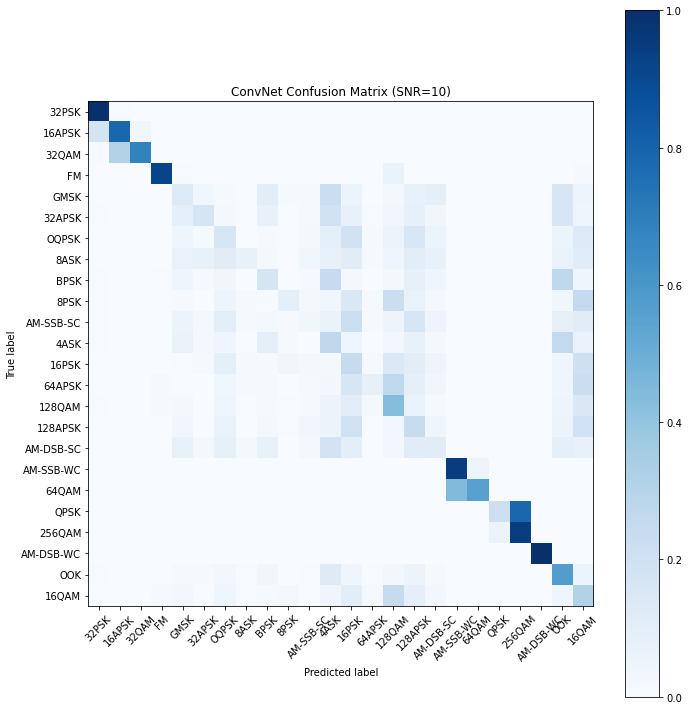

<Figure size 432x288 with 0 Axes>

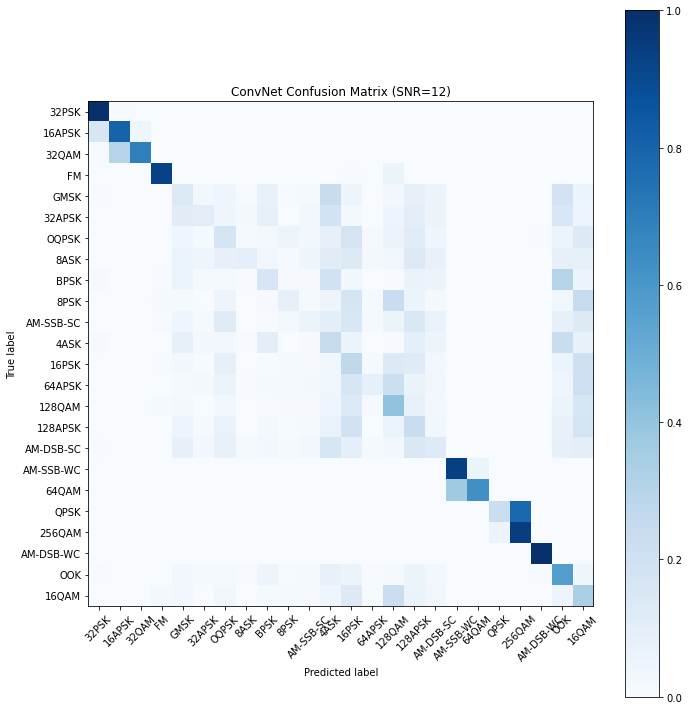

<Figure size 432x288 with 0 Axes>

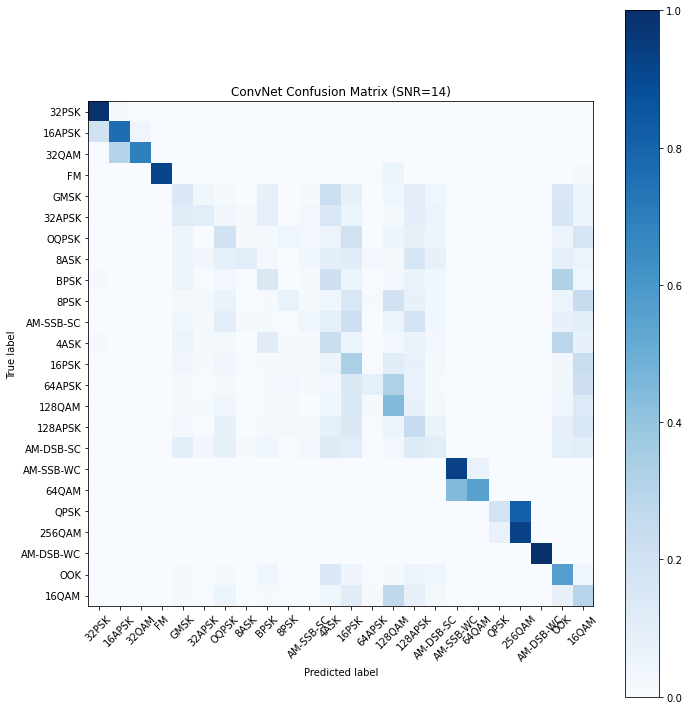

<Figure size 432x288 with 0 Axes>

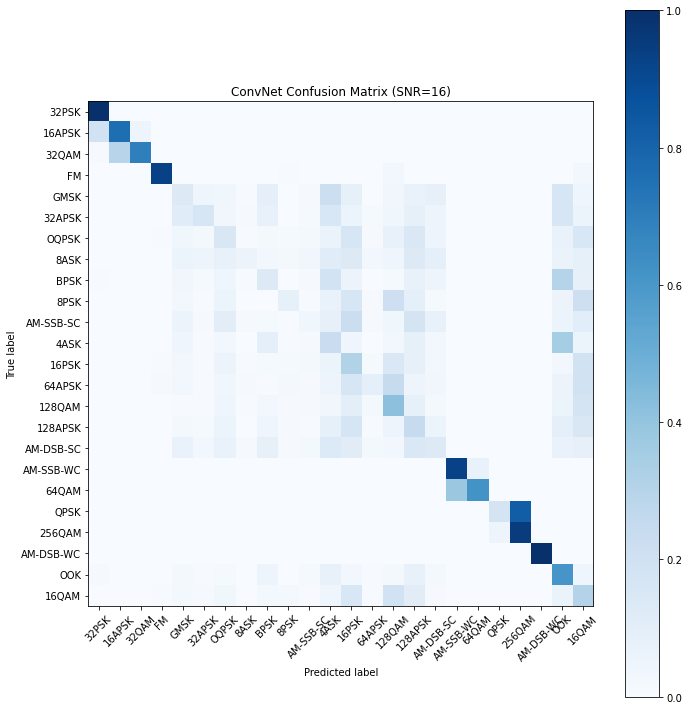

<Figure size 432x288 with 0 Axes>

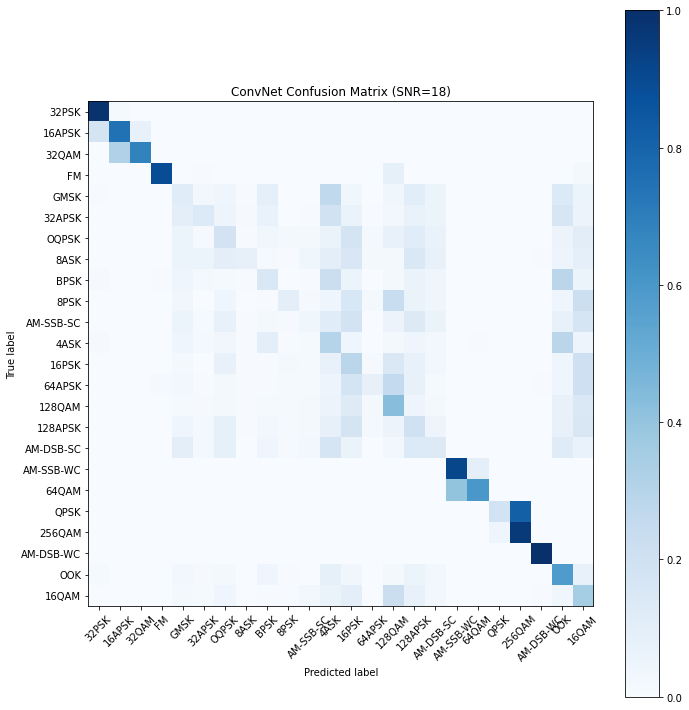

<Figure size 432x288 with 0 Axes>

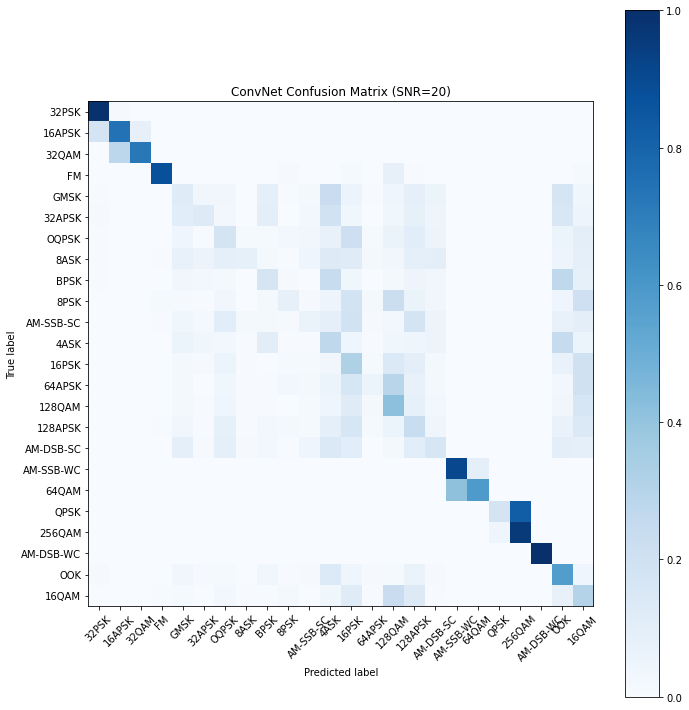

<Figure size 432x288 with 0 Axes>

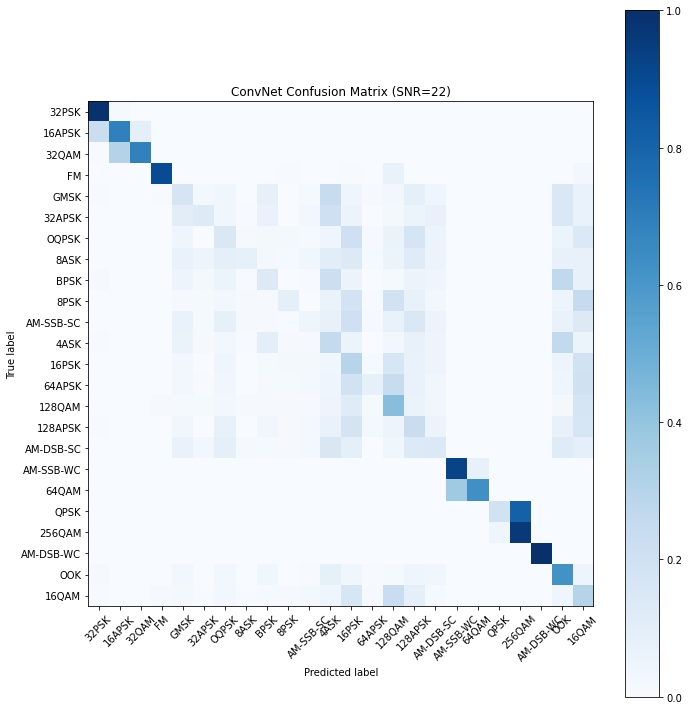

<Figure size 432x288 with 0 Axes>

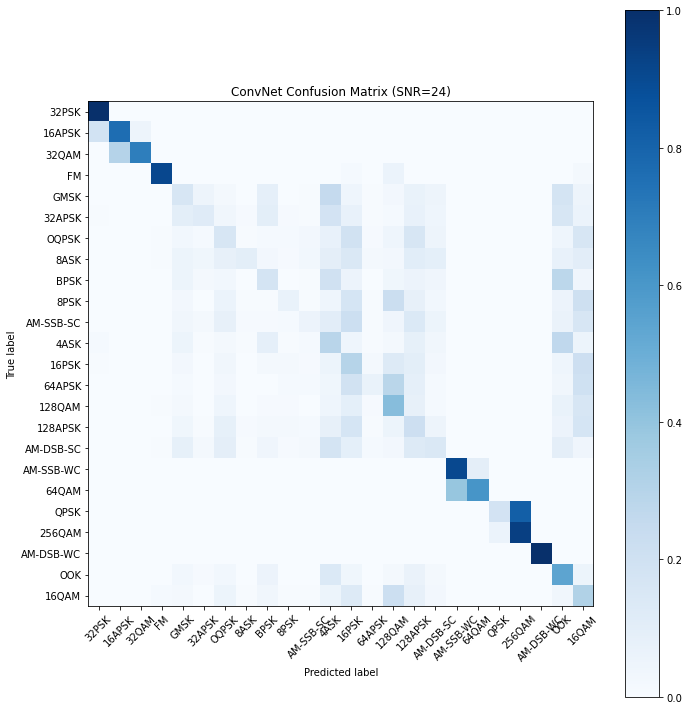

<Figure size 432x288 with 0 Axes>

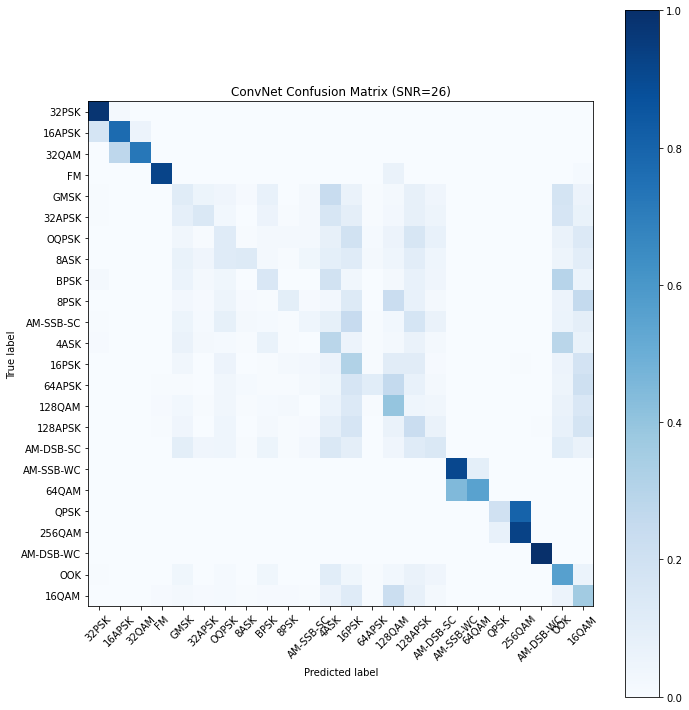

<Figure size 432x288 with 0 Axes>

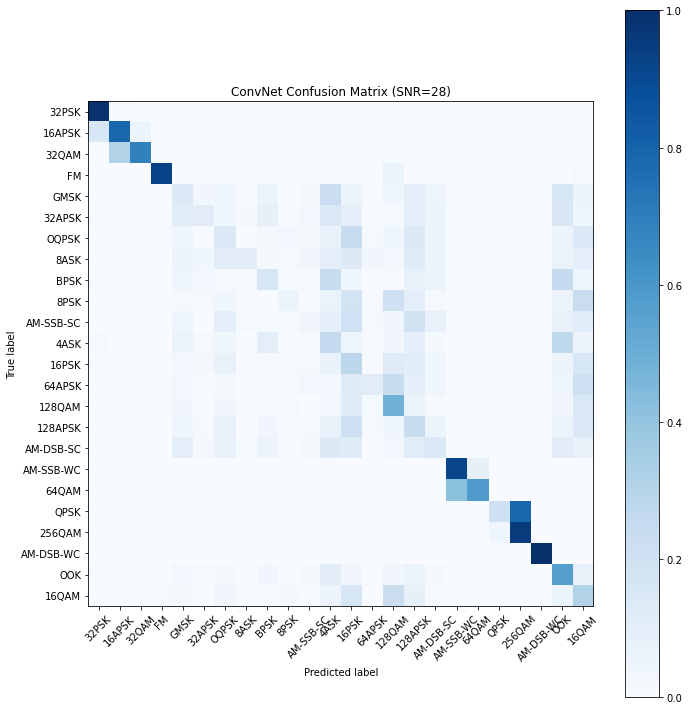

<Figure size 432x288 with 0 Axes>

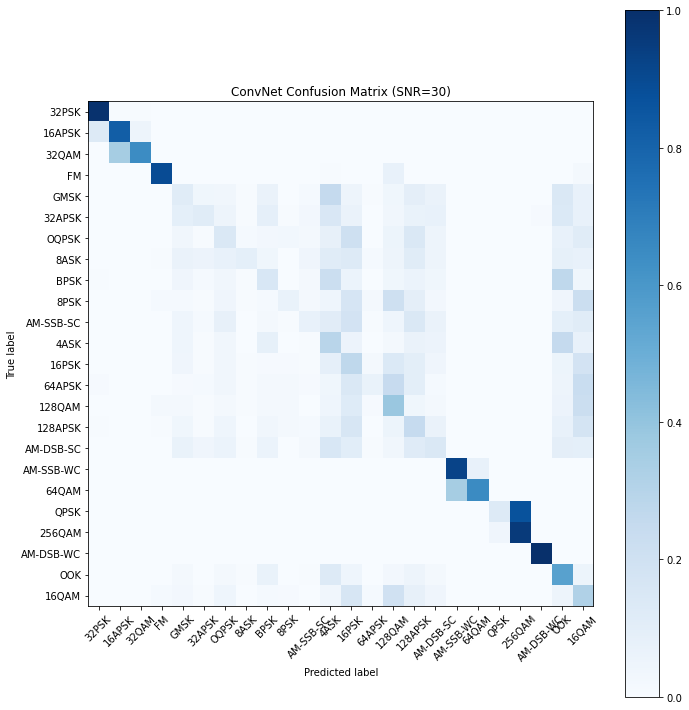

In [9]:

acc={}
Z_test = Z[test_idx]
Z_test = Z_test.reshape((len(Z_test)))
SNRs = np.unique(Z_test)
for snr in SNRs:
    X_test_snr = X_test[Z_test==snr]
    Y_test_snr = Y_test[Z_test==snr]
    
    pre_Y_test = model.predict(X_test_snr)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,X_test_snr.shape[0]):    #该信噪比下测试数据量
        j = list(Y_test_snr[i,:]).index(1)   #正确类别下标
        k = int(np.argmax(pre_Y_test[i,:])) #预测类别下标
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
   
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy %s: "%snr, cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

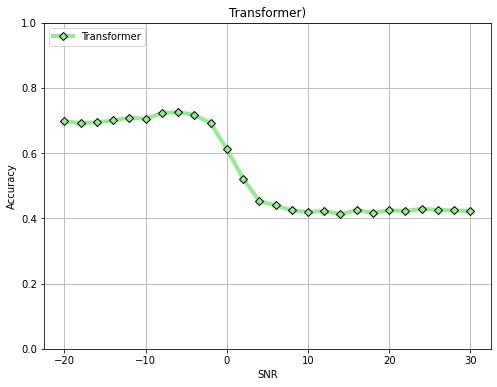

In [10]:
plt.figure(figsize=(8,6))
plt.plot(acc.keys(),acc.values(),linewidth=4,color='lightgreen', marker='D', markeredgecolor='black')
plt.ylim(0, 1) 
plt.ylabel('Accuracy')
plt.xlabel('SNR')
plt.title('Transformer)')
plt.grid()
plt.legend(['Transformer'],loc='upper left')
plt.show()

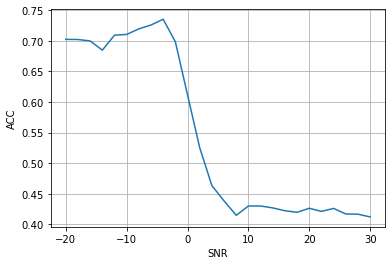

In [19]:

plt.plot(acc.keys(),acc.values())
plt.ylabel('ACC')
plt.xlabel('SNR')
plt.grid(True)
plt.show()

In [20]:
model.save('trafo_model.hdf5')

In [21]:
model.save_weights('trafo_model')

In [18]:
model.load_weights('trafo_model')